# Investigating Galaxy Data

Today we are going to revisit our Pandas and Matplotlib skills in order to investigate some real data that was taken from the NGC5533 galaxy.

The investigation we are going to undergo is very much a real-world application of these skills. In fact, this same research endevour was carried out by physicists to provide one of the first pieces of evidence of Dark Matter in our universe. 

> Don't worry, you will not need to know any physics ahead of time. I will provide you with a bit of background information as well as any equations you need.

## NGC5533

We will be studying stars in the [NGC5533](https://en.wikipedia.org/wiki/NGC_5533) galaxy, which is a spiral galaxy in the constellation Boötes.

![ngc5533](NGC5533.jpg)


# Circular Motion and Gravity

Similar to how the Earth rotates around the Sun, stars in a galaxy rotate around the centre of the galaxy (which is typically a black hole). **The speed at which the stars rotate at depends on how much mass is *enclosed* within their orbit**. For instance, the enclosed mass within the Earth's orbit is dominated by the mass of the Sun.

> A **rotation curve** is a plot of the rotational (or orbital) velocity of stars in a galaxy in terms of their distance from the center of the galaxy (also known as the radius). 


Here is an example of a rotation curve for the galaxy NGC3198:

![rc](rotation.png)




Using photometric data of the luminous matter (i.e. the stuff we can see), a rotation curve of a galaxy can be created. It is used to estimate the enclosed mass within a radius by equating the centripetal force to the gravitational force. By doing so, you can find the following relationship:

\begin{equation}
M_{enc}=\frac{v^2r}{G}
\end{equation}

where:

$v$ = orbital speed of the star

$G$ = gravitational constant
                
$M_{enc}$ = enclosed mass within the star's orbit
        
$r$ = radius or distance from the center of the galaxy



Since stars are very massive objects - and the distances we are considering are also very large - we typically use the units of sollar masses ($M_\odot$) and kiloparsecs ($1\mathrm{kpc}=3.086\times10^{19}\mathrm{m}$). We can also set our gravitational constant to be in similar units, where $G=4.30\times 10^{-6}\mathrm{kpc}\cdot\mathrm{km}^2/ M_\odot / \mathrm{s}^2$.

### 1. Import the following modules under the given variable names
- `numpy` as `np`
- `pandas` as `pd`
- `matplotlib.pyplot` as `plt`

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### 2. Define a variable `G` and assign it to the value of the gravitational constant above.
- **Tip:** To keep track of the units of your variables, it is useful to include the units in a comment beside the variable definition. For example:

```python
acceleration = 20 # m / s^2
```

In [2]:
# The gravitational constant 
G = 4.300917270038e-06 # kpc.km^2/𝑀_solar/s^2

### 3. Refer to the equations above to define the function:
- `calculate_enclosed_mass` which calculates **and returns** `M_enc` from input arguments `v` and `r`. 
    - You can use the global variable `G` defined previously. 

In [3]:
def calculate_enclosed_mass(r, v):
    return v**2 * r / G

### 4. Load the `NGC5533.csv` file into a Pandas dataframe and assign this to the variable `galaxy_df`.
- Display the data in your notebook to get an understanding of what is included in the file.

In [4]:
galaxy_df = pd.read_csv('NGC5533.csv')
galaxy_df

,Distance (kpc),Velocity (km/s),Enclosed Black Hole Mass (solar masses),Enclosed Bulge Mass (solar masses),Enclosed Disk Mass (solar masses),Enclosed Gas Mass (solar masses)
0,0.2870,296.0137,2.875024e+09,2.471273e+09,8.228282e+07,2.222303e-05
1,0.5840,284.4247,2.875024e+09,6.879160e+09,1.710320e+08,1.282361e+05
2,0.8895,274.9315,2.875024e+09,1.171199e+10,4.608944e+08,8.290364e+05
3,1.1944,275.1781,2.875024e+09,1.637696e+10,6.864635e+08,2.447962e+06
4,1.4950,273.4521,2.875024e+09,2.067437e+10,9.119764e+08,5.495112e+06
...,...,...,...,...,...,...
64,84.1629,220.7407,2.875024e+09,6.588378e+10,1.733391e+11,5.658086e+10
65,86.9066,223.0864,2.875024e+09,6.586235e+10,1.714435e+11,5.843151e+10
66,89.4159,222.9630,2.875024e+09,6.584433e+10,1.710907e+11,5.902571e+10
67,94.6947,225.8025,2.875024e+09,6.581071e+10,1.697026e+11,6.017022e+10


You will notice that there are several columns in this dataset. The first two represent rotation curve information for stars in the NGC5533 galaxy:
- **Distance (kpc)**: Distance measurements (in kiloparsecs) from the centre of the galaxy to the star.
- **Velocity (km/s)**: Orbital velocity measurements (in km/s) of the star orbiting the centre of the galaxy.

You will also notice several *enclosed mass* columns which are all in units of Solar Masses. We will look into these shortly.

### 5. Using `plt.scatter` create a rotation curve for the NGC5533 galaxy.
- Velocity should be on the vertical axis and radius should be on the horizontal axis.
- Include a title.
- Label your axes appropriately (and include units).
- Before running `plt.show()`, call `plt.grid()` or `ax.grid()` to include gridlines on your plot.

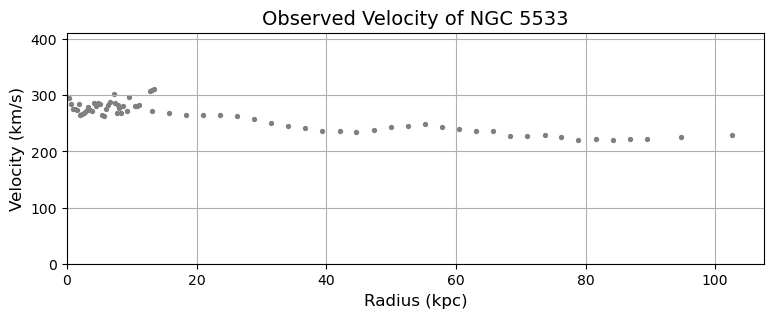

In [5]:
# Plot 
plt.figure(figsize=(9,3))                                               
plt.scatter(galaxy_df['Distance (kpc)'], galaxy_df['Velocity (km/s)'], 
            marker='o', s=8, color='gray')
plt.xlabel('Radius (kpc)',size=12)
plt.ylabel('Velocity (km/s)',size=12)
plt.title(str('Observed Velocity of NGC 5533'), size=14)
plt.xlim(0,np.max(galaxy_df['Distance (kpc)'])+5)
plt.ylim(0,np.max(galaxy_df['Velocity (km/s)'])+100)
plt.grid()
plt.show()

# Galaxy Structure

As seen in the image below, there are multiple sources that contribute to the mass of a galaxy. Some of the main sources include:

- a central black hole
- the mass of the stars in the "bulge" of the galaxy
- the main stellar disk
- the surrounding gas cloud. 

These contributions make up what is reffered to as the **luminous matter** of the galaxy.

When we measure the enclosed mass for a given star, some of these masses will increase as you move further away from the centre of the galaxy since you are "enclosing" more mass in that star's orbit.

![structure](galaxy_structure.png)

### 6. Create another `scatter` plot of the different mass contributions as a function of the distance from the centre of the galaxy.

- Mass should be on the vertical axis and radius should be on the horizontal axis.
- Include a title.
- Label your axes appropriately (and include units).
- Before running `plt.show()`, call `plt.grid()` or `ax.grid()` to include gridlines on your plot.
- Include a legend that should look similar to the one below:

![legend](mass_legend.png)

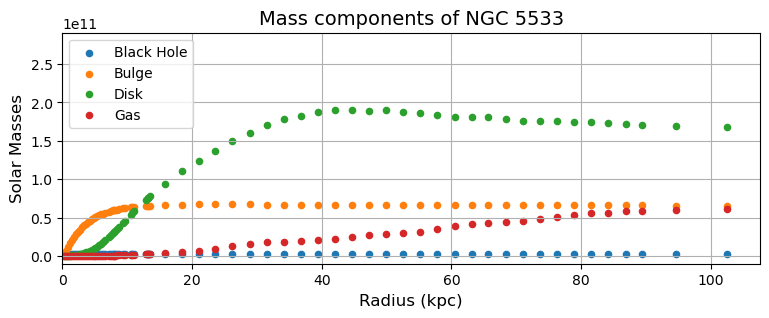

In [6]:
# Mass components
r = galaxy_df['Distance (kpc)']
v = galaxy_df['Velocity (km/s)']
M_BH = galaxy_df['Enclosed Black Hole Mass (solar masses)']
M_bulge = galaxy_df['Enclosed Bulge Mass (solar masses)']
M_disk = galaxy_df['Enclosed Disk Mass (solar masses)']
M_gas = galaxy_df['Enclosed Gas Mass (solar masses)']

# Plot 
plt.figure(figsize=(9,3))                                               

for M, label in zip([M_BH, M_bulge, M_disk, M_gas],
                    ['Black Hole', 'Bulge', 'Disk', 'Gas']):
    plt.scatter(r, M, s=20, label=label)
plt.xlabel('Radius (kpc)',size=12)
plt.ylabel('Solar Masses',size=12)
plt.title(str('Mass components of NGC 5533'), size=14)
plt.xlim(0,np.max(r)+5)
plt.ylim(-1e10,np.max(M_disk)+1e11)
plt.legend()
plt.grid()
plt.show()

> **Our goal is to combine these contributions and compare this to the measured enclosed mass that we can obtain from the radial velocity curve of the galaxy.**

### 7. Calculate the enclosed luminous mass `M_lum` by include these four contributions such that

\begin{equation}
M_{lum} = M_{BH} + M_{bulge} + M_{disk} + M_{gas}
\label{eq:M_enc}
\end{equation}

where:

$M_{BH}$ = mass of the central black hole

$M_{bulge}$ = mass of the galaxy bulge

$M_{disk}$ = mass of the main stellar disk

$M_{gas}$ = mass of the main gas cloud

**Note:** Since each of your masses is actually a Sequence of values (one for each distance), by adding them together, your luminous mass will also be a Sequence of values!

In [7]:
M_lum = M_BH + M_bulge + M_disk + M_gas
M_lum

0     5.428580e+09
1     9.925345e+09
2     1.504873e+10
3     1.994090e+10
4     2.446687e+10
          ...     
64    2.986788e+11
65    2.986124e+11
66    2.988357e+11
67    2.985585e+11
68    2.978925e+11
Length: 69, dtype: float64

### 8. Use your `calculate_enclosed_mass` function to calculate the *actual* enclosed mass by using the measurements of **`Distance (kpc)`** and **`Velocity (km/s)`** from the original data file. Assign this to the variable `M_meas`.

> Again, this should provide a sequence of enclosed masses - one for each star.

In [8]:
# From RV curve
M_meas = calculate_enclosed_mass(r, v)
M_meas

0     5.847153e+09
1     1.098465e+10
2     1.563270e+10
3     2.102889e+10
4     2.599218e+10
          ...     
64    9.535082e+11
65    1.005629e+12
66    1.033521e+12
67    1.122592e+12
68    1.245593e+12
Length: 69, dtype: float64

### 9. Create a scatter plot that compares `M_lum` and `M_meas`.

- Mass should be on the vertical axis and radius should be on the horizontal axis.
- Include a title.
- Label your axes appropriately (and include units).
- Before running `plt.show()`, call `plt.grid()` or `ax.grid()` to include gridlines on your plot.
- Include a legend that should have two entries (Luminous and Measured).

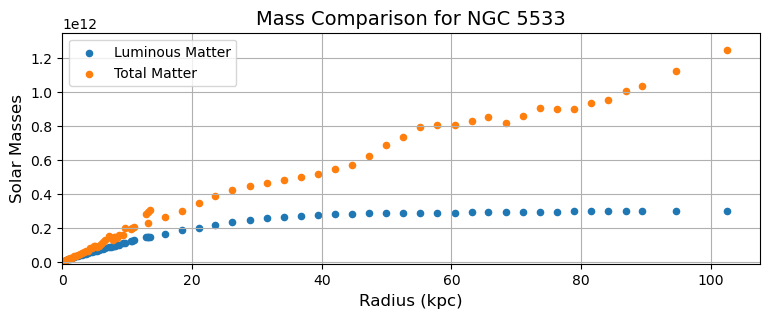

In [9]:
# Plot 
plt.figure(figsize=(9,3))                                               

plt.scatter(r, M_lum, s=20, label='Luminous Matter')
plt.scatter(r, M_meas, s=20, label='Total Matter')

plt.xlabel('Radius (kpc)',size=12)
plt.ylabel('Solar Masses',size=12)
plt.title(str('Mass Comparison for NGC 5533'), size=14)
plt.xlim(0,np.max(r)+5)
plt.ylim(-1e10,np.max(M_meas)+1e11)
plt.legend()
plt.grid()
plt.show()

### 10. **Reflect:** What do you notice about this comparison?
> Remember: The luminous matter consists of the mass from all of the stars, gas, central black hole, etc. But the measured mass is the mass that is *actually* enclosed within each star's orbit. If they disagree by a substantial amount, there must be something BIG missing.

### 11. Calculate the difference between the two enclosed masses: `M_meas - M_lum`. What is this difference equal to for the star that is furthest away from the centre of the galaxy?


In [10]:
M_diff = M_meas - M_lum # Solar masses
print(f'The missing enclosed mass is {M_diff.iloc[-1]:0.3e} solar masses')

The missing enclosed mass is 9.477e+11 solar masses


### 12. **Reflect:** What does this difference in mass tell you?